# *Importing Libraries*

In [26]:
import pandas as pd
import altair as alt
from siuba import _, filter, group_by, summarize, count, mutate, select, arrange
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## *Importing Data*

__*Data comes from Tidy Tuesday project that is aimed at the R ecosystem. I will be using Python to draw insights from this dataset.*__

In [27]:
baby_names = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-22/babynames.csv')

In [28]:
baby_names.head(4)

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866


In [29]:
baby_names.isnull().sum() # there's no missing data at all in this dataset

year    0
sex     0
name    0
n       0
prop    0
dtype: int64

## *Exploratory Data Analysis*

In [30]:
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   year    int64  
 1   sex     object 
 2   name    object 
 3   n       int64  
 4   prop    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 73.4+ MB


In [31]:
baby_names['year'].unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017])

*We can see that we have got a whole lot of names from different years*

In [32]:
observations_by_year = baby_names[['year']].value_counts().rename_axis('year').reset_index(name='counts')

In [33]:
observations_by_year.head()

,year,counts
0,2008,35070
1,2007,34950
2,2009,34702
3,2006,34082
4,2010,34067


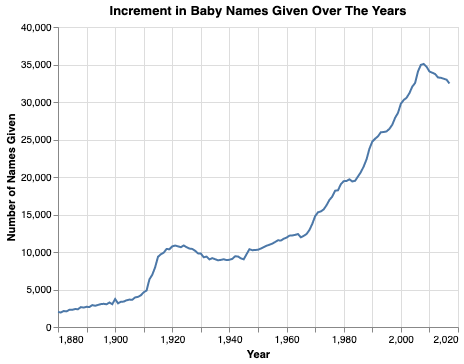

In [34]:
(alt.Chart(observations_by_year).
     mark_line().encode(x = alt.Y('year', title = 'Year'), y = alt.Y('counts', title = 'Number of Names Given')).
     properties(title = 'Increment in Baby Names Given Over The Years')
)

## *Let's dig at 1998*

In [35]:
baby_names[baby_names['year'] == 1998]

,year,sex,name,n,prop
1276291,1998,F,Emily,26181,0.013509
1276292,1998,F,Hannah,21373,0.011028
1276293,1998,F,Samantha,20193,0.010419
1276294,1998,F,Sarah,19879,0.010257
1276295,1998,F,Ashley,19874,0.010255
...,...,...,...,...,...
1304185,1998,M,Zayvon,5,0.000002
1304186,1998,M,Ziaire,5,0.000002
1304187,1998,M,Zildjian,5,0.000002
1304188,1998,M,Zykeem,5,0.000002


In [36]:
baby_names>> filter(_.name == 'Emily')

,year,sex,name,n,prop
99,1880,F,Emily,210,0.002152
2089,1881,F,Emily,244,0.002468
4029,1882,F,Emily,272,0.002351
6142,1883,F,Emily,342,0.002849
8226,1884,F,Emily,364,0.002646
...,...,...,...,...,...
1850539,2015,M,Emily,17,0.000008
1859225,2016,F,Emily,10957,0.005682
1887970,2016,M,Emily,7,0.000003
1892207,2017,F,Emily,9746,0.005198


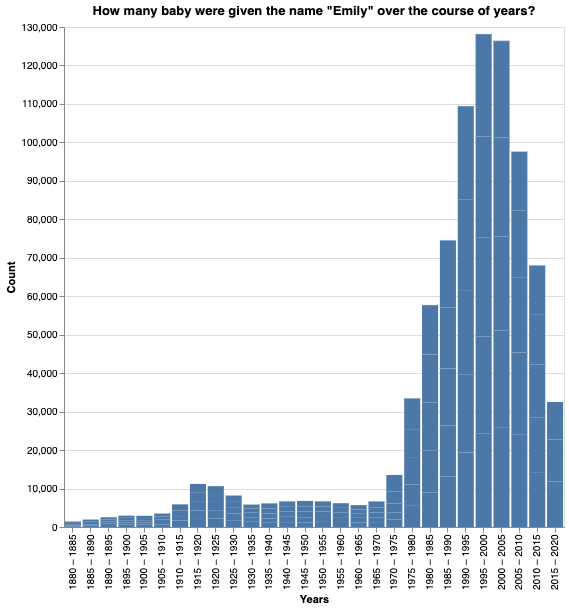

In [37]:
(alt.Chart(baby_names>> filter(_.name == 'Emily')).
     mark_bar().
     encode(x = alt.X('year:N',title = 'Years', bin = alt.Bin(maxbins=30)),
            y = alt.Y('n', title = 'Count')).
     properties(title = 'How many baby were given the name "Emily" over the course of years?', 
                height = 500, width = 500)
)

In [38]:
baby_names_1998 = baby_names >> filter(_.year == 1998)

In [39]:
baby_names_1998.head()

,year,sex,name,n,prop
1276291,1998,F,Emily,26181,0.013509
1276292,1998,F,Hannah,21373,0.011028
1276293,1998,F,Samantha,20193,0.010419
1276294,1998,F,Sarah,19879,0.010257
1276295,1998,F,Ashley,19874,0.010255


In [40]:
frequently_occuring_names_in_1998 = baby_names_1998 >> arrange(- _.n) >> filter(_.n > 24000)

In [41]:
frequently_occuring_names_in_1998

,year,sex,name,n,prop
1292889,1998,M,Michael,36614,0.018062
1292890,1998,M,Jacob,36014,0.017766
1292891,1998,M,Matthew,31142,0.015363
1292892,1998,M,Joshua,28088,0.013856
1292893,1998,M,Christopher,27001,0.013320
1292894,1998,M,Nicholas,26634,0.013139
1276291,1998,F,Emily,26181,0.013509


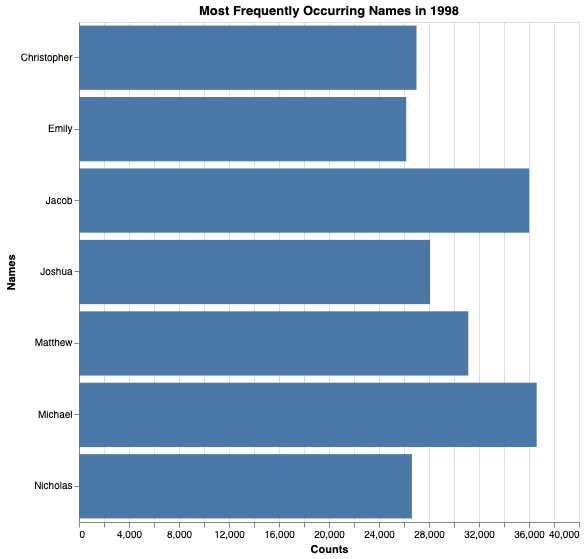

In [42]:
(alt.Chart(frequently_occuring_names_in_1998).
     mark_bar().
     encode(y = alt.Y('name', title = 'Names'), x = alt.X('n', title = 'Counts')).
     properties(title = 'Most Frequently Occurring Names in 1998', 
                height = 500, width = 500)
)

In [43]:
emma_male = baby_names >> filter(_.name == 'Emma') >> filter(_.sex == 'M')

In [44]:
emma_male

,year,sex,name,n,prop
1554,1880,M,Emma,10,0.000084
3555,1881,M,Emma,9,0.000083
5740,1882,M,Emma,7,0.000057
7865,1883,M,Emma,7,0.000062
9992,1884,M,Emma,9,0.000073
...,...,...,...,...,...
1783873,2013,M,Emma,18,0.000009
1818811,2014,M,Emma,12,0.000006
1852829,2015,M,Emma,10,0.000005
1883202,2016,M,Emma,18,0.000009


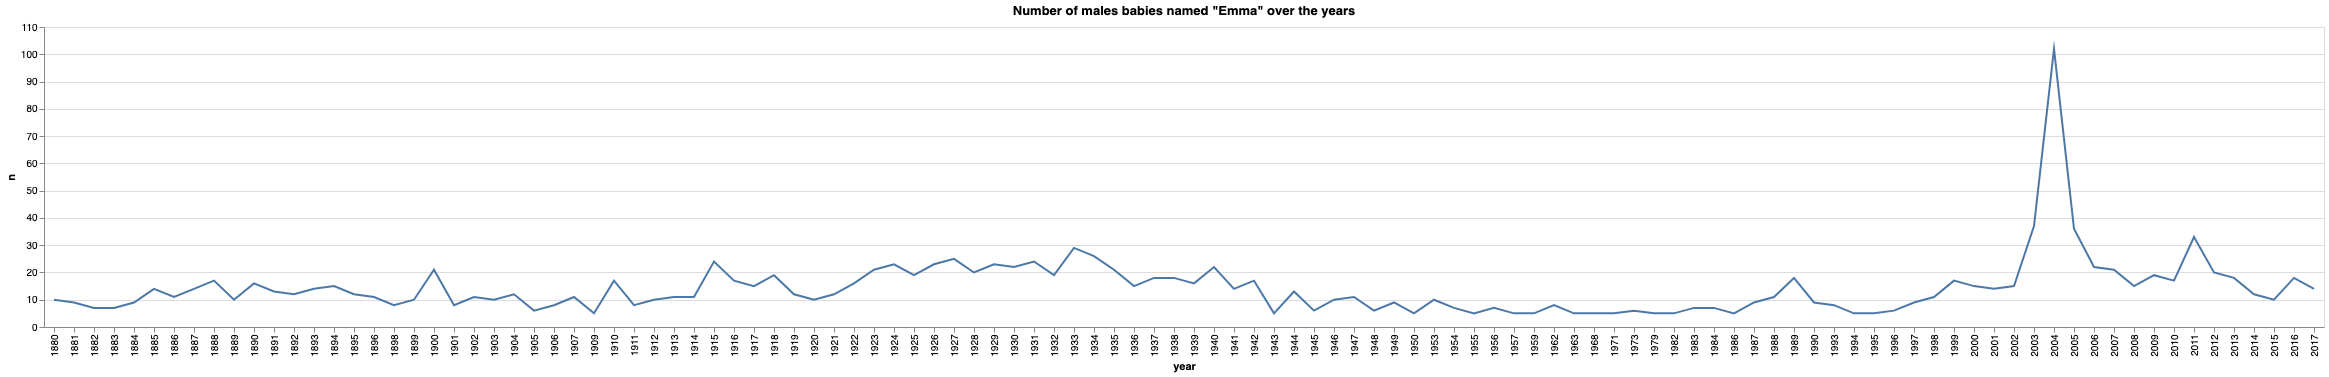

In [45]:
alt.Chart(emma_male).mark_line().encode(x = alt.X('year:N'), y = 'n').properties(title = 'Number of males babies named "Emma" over the years')

__*There seems to be a pretty high rise between 2002 and 2005 in the baby boys who were named "Emma"*__

## *Let's see how many babies were named after "Kobe"*

__*I grew up a massive Kobe fan and that's the only reason I wanted to see these stats.*__

In [46]:
kobe_named_babies = baby_names[baby_names['name'] == "Kobe"]

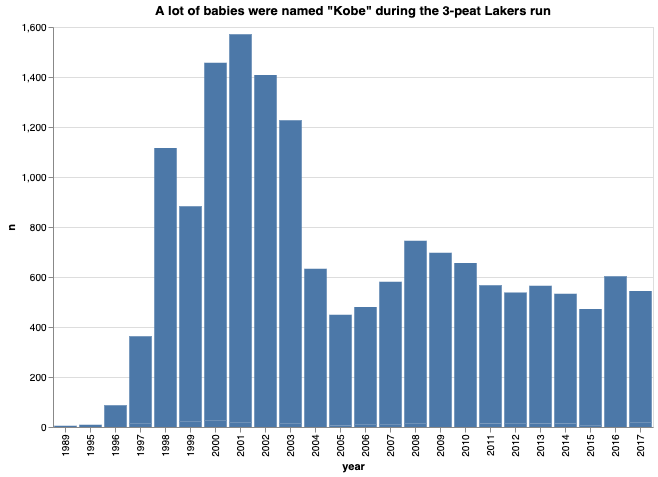

In [47]:
(alt.Chart(kobe_named_babies).mark_bar().
     encode(x = 'year:N', y = 'n').
     properties(title = 'A lot of babies were named "Kobe" during the 3-peat Lakers run', 
                width = 600, 
                height = 400))

In [48]:
cristiano_named_babies = baby_names[baby_names['name'] == "Cristiano"]

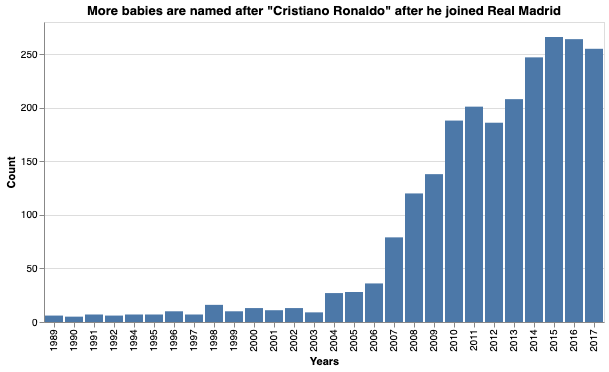

In [49]:
(alt.Chart(cristiano_named_babies).
     mark_bar().
     encode(x = alt.X('year:N', title = 'Years'), 
            y = alt.Y('n', title = 'Count')).
     properties(title = 'More babies are named after "Cristiano Ronaldo" after he joined Real Madrid')
)